# Fight Lyme Disease Predictions

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [2]:
#Importing the dataset
dataset = pd.read_csv('LymeSurveyPreproc.csv')

In [3]:
dataset.head()

,Unnamed: 0,record_time,start_treat,doxy,ilads,buhner,cowden,liposomal,other_herbs,vitaminD,...,weight_past,fever_continuing,fever_current,fever_past,Parkinson_continuing,Parkinson_current,Parkinson_past,muscle_decay_continuing,muscle_decay_current,muscle_decay_past
0,0,2018/08/21 2:49:54 PM EET,18.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,1
1,1,2018/08/21 2:53:43 PM EET,72.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
2,2,2018/08/21 2:54:25 PM EET,8.0,0.0,13.0,0.0,0.0,0.0,0.0,13.0,...,0,0,1,0,0,1,0,0,1,0
3,3,2018/08/21 2:54:43 PM EET,36.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,4,2018/08/21 2:58:15 PM EET,36.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.shape

(105, 160)

In [5]:
for i in range(0, 160, 10):
    display(dataset.iloc[:,i:i+10].describe())

,Unnamed: 0,start_treat,doxy,ilads,buhner,cowden,liposomal,other_herbs,vitaminD
count,105.000000,91.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,52.000000,35.406593,0.685714,5.171429,1.276190,0.085714,0.609524,2.495238,3.419048
std,30.454885,29.240375,2.095390,9.493375,3.781268,0.556678,2.640277,6.874037,7.426280
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,36.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,72.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,104.000000,72.000000,19.000000,48.000000,24.000000,4.000000,24.000000,48.000000,48.000000


,supp,oil,kambo,plasma,sugar-free,gluten-free,dairy-free,bioresonance,antimicrobial,oxygen
count,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,6.142857,0.409524,0.0,0.190476,4.600000,3.714286,2.314286,1.190476,2.161905,0.047619
std,10.658536,2.491120,0.0,1.855839,10.674917,9.181623,7.459267,5.508901,8.081465,0.213980
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.0,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000
max,48.000000,24.000000,0.0,19.000000,72.000000,48.000000,48.000000,48.000000,72.000000,1.000000


,cannabis,binaural,tobacco,alcohol,coffee,marijuana,other_stim,num_antibiotics,effective,blood_A+
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,75.000000,100.000000,105.000000
mean,0.476190,1.619048,0.961905,0.323810,1.552381,0.171429,0.057143,2.000000,5.260000,0.190476
std,2.700054,5.916699,1.307698,0.563219,1.300746,0.469393,0.233229,1.732051,2.769312,0.394560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.750000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,5.000000,0.000000
75%,0.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.000000,4.000000,8.000000,0.000000
max,24.000000,48.000000,3.000000,2.000000,3.000000,3.000000,1.000000,10.000000,10.000000,1.000000


,blood_A-,blood_AB+,blood_AB-,blood_B+,blood_O+,blood_O-,blood_TBD,infection_anaplasma,infection_babesia,infection_bartonella
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.057143,0.104762,0.019048,0.142857,0.257143,0.066667,0.114286,0.076190,0.371429,0.676190
std,0.233229,0.307715,0.137348,0.351605,0.439155,0.250640,0.319684,0.266575,0.485504,0.470173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,infection_lyme,infection_brucellosis,infection_candida,infection_c_pneumoniae,infection_c_trachomatis,infection_CMV,infection_lamblia,infection_m_pneumoniae,infection_m_ureyacelum,infection_parasite
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.952381,0.009524,0.257143,0.295238,0.066667,0.047619,0.085714,0.371429,0.066667,0.257143
std,0.213980,0.097590,0.439155,0.458337,0.250640,0.213980,0.281284,0.485504,0.250640,0.439155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,infection_staph,infection_toxin,infection_toxoplasmosis,infection_ureaplasma,infection_yersinia,infection_mrsa,infection_epstein-barr,residence_big_city,residence_country,residence_small_city
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.038095,0.209524,0.066667,0.028571,0.247619,0.009524,0.114286,0.266667,0.276190,0.428571
std,0.192344,0.408921,0.250640,0.167398,0.433699,0.097590,0.319684,0.444338,0.449257,0.497245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,method_antibiotics_intra_pulse,method_antibiotics_oral_daily,method_antibiotics_oral_intra_daily,method_antibiotics_oral_pulse,depression_continuing,depression_current,depression_past,unreal_continuing,unreal_current,unreal_past
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.009524,0.485714,0.028571,0.142857,0.038095,0.342857,0.238095,0.047619,0.314286,0.228571
std,0.097590,0.502193,0.167398,0.351605,0.192344,0.476941,0.427960,0.213980,0.466457,0.421927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,irritability_continuing,irritability_current,irritability_past,sleep_continuing,sleep_current,sleep_past,conc_continuing,conc_current,conc_past,stupor_continuing
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.047619,0.371429,0.285714,0.047619,0.390476,0.323810,0.085714,0.371429,0.333333,0.038095
std,0.213980,0.485504,0.453921,0.213980,0.490197,0.470173,0.281284,0.485504,0.473665,0.192344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,stupor_current,stupor_past,memory_continuing,memory_current,memory_past,stiffness_continuing,stiffness_current,stiffness_past,breath_continuing,breath_current
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.352381,0.285714,0.085714,0.323810,0.285714,0.057143,0.419048,0.323810,0.028571,0.285714
std,0.480003,0.453921,0.281284,0.470173,0.453921,0.233229,0.495770,0.470173,0.167398,0.453921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,breath_past,fatigue_continuing,fatigue_current,fatigue_past,numb_continuing,numb_current,numb_past,strength_continuing,strength_current,strength_past
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.209524,0.114286,0.409524,0.361905,0.066667,0.400000,0.304762,0.085714,0.295238,0.380952
std,0.408921,0.319684,0.494104,0.482856,0.250640,0.492248,0.462514,0.281284,0.458337,0.487950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ache_continuing,ache_current,ache_past,arthralgia_continuing,arthralgia_current,arthralgia_past,headache_continuing,headache_current,headache_past,facial_muscle_continuing
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.047619,0.400000,0.304762,0.066667,0.380952,0.333333,0.028571,0.380952,0.295238,0.009524
std,0.213980,0.492248,0.462514,0.250640,0.487950,0.473665,0.167398,0.487950,0.458337,0.097590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,facial_muscle_current,facial_muscle_past,abdominal_continuing,abdominal_current,abdominal_past,gastro_reflux_continuing,gastro_reflux_current,gastro_reflux_past,eye_continuing,eye_current
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.323810,0.142857,0.009524,0.171429,0.228571,0.009524,0.133333,0.209524,0.085714,0.380952
std,0.470173,0.351605,0.097590,0.378691,0.421927,0.097590,0.341565,0.408921,0.281284,0.487950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,eye_past,ringing_continuing,ringing_current,ringing_past,light_continuing,light_current,light_past,sound_continuing,sound_current,sound_past
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.247619,0.038095,0.276190,0.247619,0.019048,0.304762,0.219048,0.009524,0.247619,0.200000
std,0.433699,0.192344,0.449257,0.433699,0.137348,0.462514,0.415585,0.097590,0.433699,0.401918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,toothache_continuing,toothache_current,toothache_past,rash_continuing,rash_current,rash_past,hair_continuing,hair_current,hair_past,chest_pain_continuing
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.028571,0.266667,0.152381,0.047619,0.257143,0.228571,0.047619,0.304762,0.190476,0.057143
std,0.167398,0.444338,0.361113,0.213980,0.439155,0.421927,0.213980,0.462514,0.394560,0.233229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,chest_pain_current,chest_pain_past,bladder_continuing,bladder_current,bladder_past,libido_continuing,libido_current,libido_past,weight_continuing,weight_current
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.276190,0.209524,0.066667,0.171429,0.190476,0.076190,0.219048,0.200000,0.047619,0.190476
std,0.449257,0.408921,0.250640,0.378691,0.394560,0.266575,0.415585,0.401918,0.213980,0.394560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,weight_past,fever_continuing,fever_current,fever_past,Parkinson_continuing,Parkinson_current,Parkinson_past,muscle_decay_continuing,muscle_decay_current,muscle_decay_past
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.152381,0.019048,0.152381,0.057143,0.019048,0.190476,0.152381,0.019048,0.104762,0.066667
std,0.361113,0.137348,0.361113,0.233229,0.137348,0.394560,0.361113,0.137348,0.307715,0.250640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- start_treat has 91 counts of non-NaN entries
- kambo does not have any positive entries (all 0) (Jan drops the column)
- num_antibiotics has 75 non-NaN entries
- effective has 100 non-NaN entries

## Reviewing Jan's codes

Jan used imputer(mean) to fill in missing values for num_antibiotics.
```python
X = pd.DataFrame(dataset.iloc[:, 2:-1].values)
X = X.drop([26], axis='columns')

y = pd.DataFrame(dataset.iloc[:, 28].values)
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean', axis = 0)
imputer = imputer.fit(X.iloc[:, 25:26])
X.iloc[:, 25:26] = imputer.transform(X.iloc[:, 25:26])
```
Jan used imputer(mean) to fill in missing values for start_treat.
```python
imputer2 = Imputer(missing_values='NaN',strategy='mean', axis = 0)
imputer2 = imputer2.fit(X.iloc[:, 0:1])
X.iloc[:, 0:1] = imputer.transform(X.iloc[:, 0:1])
```
Jan used imputer(mean) to fill in missing values for effective.
```python
imputerY = Imputer(missing_values='NaN',strategy='mean', axis = 0)
imputerY = imputerY.fit(y.iloc[:, 0:1])
y.iloc[:, 0:1] = imputer.transform(y.iloc[:, 0:1])
```

I disagree with filling in missing values for effectiveness as we do not know how effective the respective treatments are. I am more in favor of eliminating the missing entries. We will lose 5 out of 105 entries (5%).

I am not sure if we need num_antibiotics or start_treat for sure, so I will leave those for now.

*Note to self: use LabelEncoder next time to make preprocessing faster

Jan used keras.utils.np_utils.to_categorical to change effective to category.
```python
from keras.utils.np_utils import to_categorical
y_binary = to_categorical(y)
```

Jan then split training and test set with 20% test set, random_state=0.
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.2, random_state = 0)
```


```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
```

Jan used keras for ML prediction. 
```python
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean', axis = 0)
imputer = imputer.fit(X.iloc[:, 25:26])
X.iloc[:, 25:26] = imputer.transform(X.iloc[:, 25:26])

imputer2 = Imputer(missing_values='NaN',strategy='mean', axis = 0)
imputer2 = imputer2.fit(X.iloc[:, 0:1])
X.iloc[:, 0:1] = imputer.transform(X.iloc[:, 0:1])


imputerY = Imputer(missing_values='NaN',strategy='mean', axis = 0)
imputerY = imputerY.fit(y.iloc[:, 0:1])
y.iloc[:, 0:1] = imputer.transform(y.iloc[:, 0:1])

from keras.utils.np_utils import to_categorical
y_binary = to_categorical(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 156))

# Adding the second hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(np.array(X_train), np.array(y_train), batch_size = 32, epochs = 1000)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
```

I added the following code to see accuracy.
```python
score = classifier.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
```
which resulted in:

Test loss: 6.409316062927246 <br>
Test accuracy: 0.2380952388048172

## My thoughts:
1. Try predicting effectiveness based on treatment (doxy - binaural).
2. Try separating patients into subsets based on their symptoms, then try predicting effectiveness.
3. Try clustering patients into subsets based on all, then try predicting effectiveness.

Also may be important to separate patients based on start_treat as early treatment can be usually treated with antibiotics.

In [6]:
# drop rows where patient did not rate effectiveness of treatment
df = dataset.dropna(subset=['effective'])
df.shape

(100, 160)

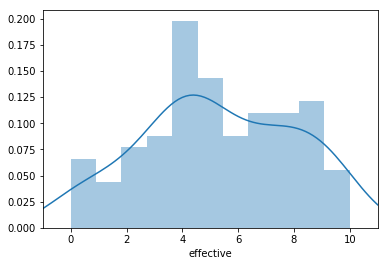

In [7]:
# distribution of effectiveness rating
import seaborn as sns
sns.distplot(df['effective'], bins=11)
plt.xlim(-1, 11);

In [8]:
# group effectiveness into 4 categories
def calc_effective(x):
    if x < 3: return 'Very ineffective'
    elif x < 6: return 'Ineffective'
    elif x < 8: return 'Effective'
    else: return 'Very effective'

col = df['effective'].apply(calc_effective)
df = df.assign(how_effect=col.values)

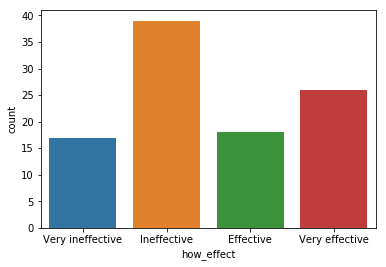

In [9]:
sns.countplot(df['how_effect'], order=['Very ineffective', 'Ineffective', 'Effective', 'Very effective']);

In [10]:
# drop kambo column as no one got this treatment
df = df.drop('kambo', axis = 1)

In [11]:
# make feature & label
X = df.drop(['effective', 'how_effect'], axis=1)
X = X.iloc[:, 2:]
y = df['how_effect']

In [12]:
# make training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

def unoptimized_clf(X_train, X_test, y_train, y_test):
    '''
    get random forest clf and prediction
    output: trained clf, predictions
    '''
    clf = RandomForestClassifier(random_state=2)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print('Unoptimized model\n------')
    print('Accuracy score on testing data: {:.4f}'.format(accuracy_score(y_test, pred)))
    return clf, pred

# feature set containing only treatment info
X_train_treat = X_train.iloc[:, 1:19]
X_test_treat = X_test.iloc[:, 1:19]

clf_treat, pred_treat = unoptimized_clf(X_train_treat, X_test_treat, y_train, y_test)
clf_treat.get_params()

Unoptimized model
------
Accuracy score on testing data: 0.4000


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [14]:
def optimized_clf(X_train, X_test, y_train, y_test):
    '''
    get optimized random forest clf and prediction by grid search (via accuracy_score)
    output: trained best clf, best predictions
    '''
    clf = RandomForestClassifier(random_state=2)
    parameters = {'n_estimators': [10, 50, 100, 250], 
                  'max_depth': [2, 4, 6, 8, 10, 20, 50, 100, None], 
                  'min_samples_split': [2, 4, 6, 8, 10], 
                  'min_samples_leaf': [1, 2, 3, 4, 5]}
    scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
    grid_fit = grid_obj.fit(X_train, y_train)
    best_clf = grid_fit.best_estimator_
    best_pred = best_clf.predict(X_test)
    print('\nOptimized Model\n------')
    print('Final accuracy score on the testing data: {:.4f}'.format(accuracy_score(y_test, best_pred)))
    return best_clf, best_pred

In [15]:
best_clf_treat, best_pred_treat = optimized_clf(X_train_treat, X_test_treat, y_train, y_test)
best_clf_treat.get_params()


Optimized Model
------
Final accuracy score on the testing data: 0.3000


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

## Now divide patients into those treated early vs late
Lyme Disease is usually treated by 3-4 weeks of antibiotics. Stage 1 is 1-4 weeks after infection, Stage 2 is 1-4 months after infection at which point it affects the skin, joints, nervous system, and heart. Chronic (late persistent) may develop months or years after infection.

In [16]:
# look at when people started treatment
df['start_treat'].value_counts()

72.0    32
36.0    15
1.0     14
8.0     10
18.0     6
12.0     5
4.0      5
24.0     4
Name: start_treat, dtype: int64

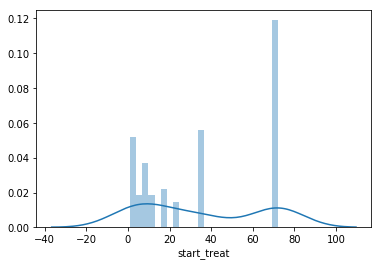

In [17]:
sns.distplot(df[~df['start_treat'].isna()]['start_treat'], bins=24);

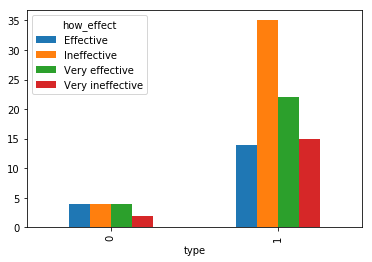

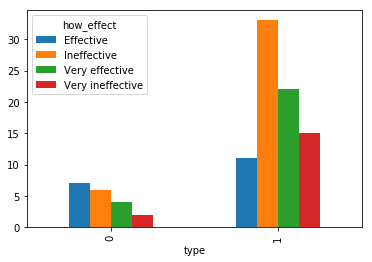

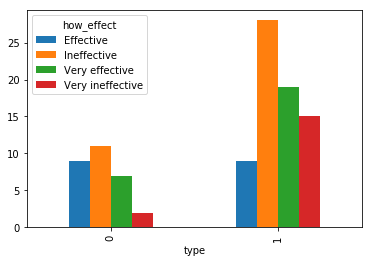

In [18]:
# divide up the dataset into early and late (add label 'type' early(0)/chronic(1), if NaN, assume chronic)
def calc_type(df, month):
    df['type'] = df['start_treat'].apply(lambda x: 0 if x <= month else 1)
    return df

for month in [1, 4, 8]:
    df = calc_type(df, month)
    df.groupby('type')['how_effect'].value_counts().unstack().plot.bar();

Let's set type to be early they started treatment <= 4 months after infection. It shifts most discrimination of ineffective treatments and also is distinction between stage 2 and chronic.

In [19]:
# add type to features
pd.options.mode.chained_assignment = None
df = calc_type(df, 4)
X_train = calc_type(X_train, 4)
X_test = calc_type(X_test, 4)

In [20]:
# make add type to training & test sets
treatments = list(X_train.iloc[:, 1:19])
column_type = treatments
column_type.append('type')
X_train_type = X_train.loc[:, column_type]
X_test_type = X_test.loc[:, column_type]
X_train_type.head()

,doxy,ilads,buhner,cowden,liposomal,other_herbs,vitaminD,supp,oil,plasma,sugar-free,gluten-free,dairy-free,bioresonance,antimicrobial,oxygen,cannabis,binaural,type
38,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
11,0.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0
89,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
47,0.0,8.0,0.0,0.0,8.0,0.0,8.0,8.0,8.0,0.0,8.0,8.0,8.0,0.0,8.0,0.0,0.0,0.0,1
78,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1


In [21]:
# early vs late in training set
X_train_type.groupby('type').count()

,doxy,ilads,buhner,cowden,liposomal,other_herbs,vitaminD,supp,oil,plasma,sugar-free,gluten-free,dairy-free,bioresonance,antimicrobial,oxygen,cannabis,binaural
type,,,,,,,,,,,,,,,,,,
0,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
1,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65


In [22]:
# early vs late in testing set 
X_test_type.groupby('type').count()

,doxy,ilads,buhner,cowden,liposomal,other_herbs,vitaminD,supp,oil,plasma,sugar-free,gluten-free,dairy-free,bioresonance,antimicrobial,oxygen,cannabis,binaural
type,,,,,,,,,,,,,,,,,,
0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


It's approximately 25% early vs. chronic. This might be too few in number for early prediction.

In [23]:
# Divide training & test sets to early vs late
df_train = pd.concat([X_train_type, y_train], axis=1)
df_test = pd.concat([X_test_type, y_test], axis=1)

df_train_early = df_train[df_train['type'] == 0]
df_train_late = df_train[df_train['type'] == 1]
df_test_early = df_test[df_test['type'] == 0]
df_test_late = df_test[df_test['type'] == 1]

In [24]:
def get_X_y(df):
    return df.iloc[:, :-1], df['how_effect']

X_train_early, y_train_early = get_X_y(df_train_early)
X_train_late, y_train_late = get_X_y(df_train_late)
X_test_early, y_test_early = get_X_y(df_test_early)
X_test_late, y_test_late = get_X_y(df_test_late)

### Early prediction

In [25]:
# should drop type at some point
clf_early, pred_early = unoptimized_clf(X_train_early, X_test_early, y_train_early, y_test_early)
clf_early.get_params()

Unoptimized model
------
Accuracy score on testing data: 0.2500


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [26]:
best_clf_early, best_pred_early = optimized_clf(X_train_early, X_test_early, y_train_early, y_test_early)
best_clf_early.get_params()

/Users/rosaria/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)



Optimized Model
------
Final accuracy score on the testing data: 0.2500


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

As expected, there just isn't enough number of patients who started treatment in early stages.

### Late prediction

In [27]:
clf_late, pred_late = unoptimized_clf(X_train_late, X_test_late, y_train_late, y_test_late)
clf_late.get_params()

Unoptimized model
------
Accuracy score on testing data: 0.5000


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [28]:
best_clf_late, best_pred_late = optimized_clf(X_train_late, X_test_late, y_train_late, y_test_late)
best_clf_late.get_params()


Optimized Model
------
Final accuracy score on the testing data: 0.7500


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [55]:
compare_pred = pd.concat([y_test_late.reset_index()['how_effect'], pd.Series(best_pred_late)], axis=1, ignore_index=True)
compare_pred = compare_pred.rename({0: 'label', 1: 'prediction'}, axis =1)
# for visualization in Tableau
compare_pred.to_csv('181106_late_prediction.csv', index=False)
compare_pred

,label,prediction
0,Effective,Very effective
1,Very effective,Very effective
2,Very ineffective,Ineffective
3,Ineffective,Ineffective
4,Ineffective,Ineffective
5,Ineffective,Ineffective
6,Very effective,Very effective
7,Ineffective,Ineffective
8,Very effective,Very effective
9,Ineffective,Very ineffective


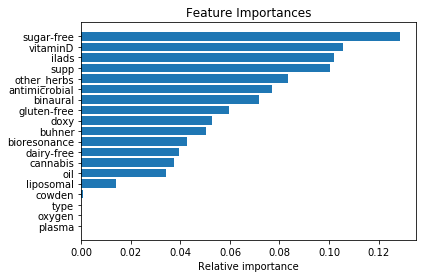

In [66]:
def make_feature_importance(clf, features):
    '''
    makes feature importance figure
    input: trained clf, list of features
    '''
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative importance');
    
make_feature_importance(best_clf_late, list(X_train_late))

### To do
- what separates very effective treatment from others (or is it more patient-specific than treatment-specific?)?
- cluster patients by their info (e.g. symptoms) and then perform prediction
- add stimulant to treatment for prediction?

In [61]:
def make_very_effective(x):
    if x == 'Very effective': return x
    else: return 'Not very effective'

y_test_late_very = y_test_late.apply(make_very_effective)
y_train_late_very = y_train_late.apply(make_very_effective)

In [62]:
clf_late_very, pred_late_very = unoptimized_clf(X_train_late, X_test_late, y_train_late_very, y_test_late_very)

Unoptimized model
------
Accuracy score on testing data: 0.6875


In [63]:
best_clf_late_very, best_pred_late_very = optimized_clf(X_train_late, X_test_late, y_train_late_very, y_test_late_very)
best_clf_late_very.get_params()


Optimized Model
------
Final accuracy score on the testing data: 0.7500


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

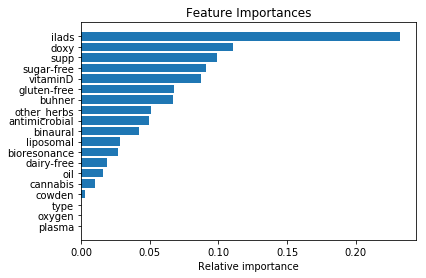

In [65]:
make_feature_importance(best_clf_late_very, list(X_train_late))